# Prática 02 - Utilização de AD

## Descrição: Utilização da técnica Árvore de Decisão. Observação: utilizar as mesmas bases da tarefa anterior e extrair os resultados dos experimentos.

### Autores: Mariana Emerenciano Miranda, Arthur Ferreira de Holanda, Artur Revoredo Pinto

#Introdução

Visando exercitar os conceitos aprendidos nas aulas de Modelos Supervisionados,
execute experimentos com a técnica Árvore de Decisão (DT), de tal forma que você possa escolher diferentes valores para alguns parâmetros pertencentes às técnicas estudadas.

# Descrição da atividade

Para a Árvore de Decisão, você deverá escolher diferentes valores para a
profundidade da árvore (max_depth), de acordo com a Figura 1. Lembre-se que você poderá explorar um conjunto de valores maior do que está sendo mostrado na referida figura.

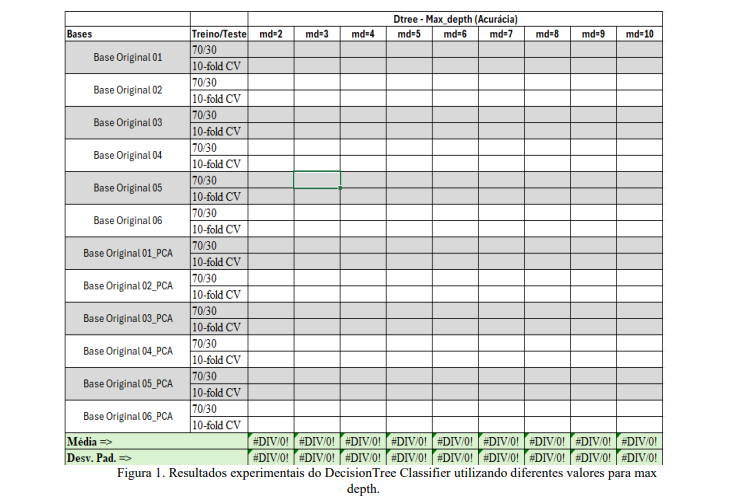

# Carregando as bases HOG e CNN

In [1]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import cv2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
def evaluate_decision_tree(X_train, X_test, y_train, y_test, max_depth_values):
    results = []
    for depth in max_depth_values:
        # Configurar o classificador com a profundidade máxima atual
        dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=depth)

        # Treinar o classificador
        dt_classifier.fit(X_train, y_train)

        # Avaliar a acurácia no conjunto de teste
        accuracy = dt_classifier.score(X_test, y_test)

        # Armazenar os resultados
        results.append(accuracy)

    return results


# Definindo a lista de profundidades máximas para testar
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
def evaluate_decision_tree_cv(X, y, max_depth_values, cv=10):
    results = []

    for depth in max_depth_values:
        # Configurar o classificador com a profundidade máxima atual
        dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=depth)

        # Realizar 10-fold cross-validation e calcular a média das acurácias
        accuracies = cross_val_score(dt_classifier, X, y, cv=cv, scoring='accuracy')
        mean_accuracy = np.mean(accuracies)

        # Adiciona a acurácia média para o valor de profundidade atual
        results.append(mean_accuracy)

    return results

In [4]:
def divisao_holdout(base_original):
  tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
  cols_num = base_original.select_dtypes(include=tipos_numericos)
  colunas_numericas = list(cols_num.columns)

  features_base_original = base_original[colunas_numericas]
  labels_base_original = base_original['label']

  X_train, X_test, y_train, y_test = train_test_split(features_base_original, labels_base_original, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test


In [5]:
def divisao_X_e_y(base_original):
  tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
  cols_num = base_original.select_dtypes(include=tipos_numericos)
  colunas_numericas = list(cols_num.columns)

  features= base_original[colunas_numericas]
  labels = base_original['label']

  return features, labels

In [6]:
hog_128_16_pca = pd.read_csv('/content/CSVs PCA/hog_128_16_PCA-10.csv')

In [7]:
hog_128_20 = pd.read_csv('/content/CSVs/hog_features_128_20.csv')

In [8]:
hog_256_16_pca = pd.read_csv('/content/CSVs PCA/hog_256_16_PCA-10.csv')

In [9]:
hog_256_20_pca = pd.read_csv('/content/CSVs PCA/hog_256_20_PCA-10.csv')

In [10]:
# Features e labels
features_hog_128_16_pca, labels_hog_128_16_pca = divisao_X_e_y(hog_128_16_pca)

features_hog_128_20, labels_hog_128_20 = divisao_X_e_y(hog_128_20)

features_hog_256_20_pca, labels_hog_256_20_pca = divisao_X_e_y(hog_256_20_pca)

features_hog_256_16_pca, labels_hog_256_16_pca = divisao_X_e_y(hog_256_16_pca)

In [11]:
X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20 = divisao_holdout(hog_128_20)

X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca = divisao_holdout(hog_128_16_pca)

X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca = divisao_holdout(hog_256_16_pca)

X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca = divisao_holdout(hog_256_20_pca)

In [12]:
cnn_vgg16_128_avg = pd.read_csv('/content/CSVs/cnn_VGG16_avg_128.csv')

In [13]:
cnn_vgg16_128_max_pca = pd.read_csv('/content/CSVs PCA/cnn_VGG16_max_128_PCA-10.csv')

In [14]:
cnn_vgg16_256_avg = pd.read_csv('/content/CSVs/cnn_VGG16_avg_256.csv')

In [15]:
cnn_vgg16_256_max = pd.read_csv('/content/CSVs/cnn_VGG16_max_256.csv')

In [16]:
cnn_vgg19_128_avg = pd.read_csv('/content/CSVs/cnn_VGG19_avg_128.csv')

In [17]:
cnn_vgg19_128_max_pca = pd.read_csv('/content/CSVs PCA/cnn_VGG19_max_128_PCA-10.csv')

In [18]:
cnn_vgg19_256_avg = pd.read_csv('/content/CSVs/cnn_VGG19_avg_256.csv')

In [19]:
cnn_vgg19_256_max_pca = pd.read_csv('/content/CSVs PCA/cnn_VGG19_256_max_PCA-10.csv')

In [20]:
features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca = divisao_X_e_y(cnn_vgg16_128_max_pca)

features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca = divisao_X_e_y(cnn_vgg19_128_max_pca)

features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca = divisao_X_e_y(cnn_vgg19_256_max_pca)

features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg = divisao_X_e_y(cnn_vgg16_128_avg)
features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg = divisao_X_e_y(cnn_vgg16_256_avg)
features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max = divisao_X_e_y(cnn_vgg16_256_max)

features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg = divisao_X_e_y(cnn_vgg19_128_avg)
features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg = divisao_X_e_y(cnn_vgg19_256_avg)

In [21]:
X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca = divisao_holdout(cnn_vgg16_128_max_pca)

X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca = divisao_holdout(cnn_vgg19_128_max_pca)

X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca = divisao_holdout(cnn_vgg19_256_max_pca)

X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg = divisao_holdout(cnn_vgg16_128_avg)
X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg = divisao_holdout(cnn_vgg16_256_avg)
X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max = divisao_holdout(cnn_vgg16_256_max)

X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg = divisao_holdout(cnn_vgg19_128_avg)
X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg = divisao_holdout(cnn_vgg19_256_avg)


## DT nos HOGs

In [22]:
# Executando a avaliação
results_hog_128_20_dt = evaluate_decision_tree(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, max_depth_values)
print(results_hog_128_20_dt)

[0.3514644351464435, 0.3472803347280335, 0.36401673640167365, 0.3598326359832636, 0.3514644351464435, 0.3807531380753138, 0.3472803347280335, 0.3472803347280335, 0.3389121338912134]


In [23]:
results_hog_128_20_dt_10fold = evaluate_decision_tree_cv(features_hog_128_20, labels_hog_128_20, max_depth_values)
print(results_hog_128_20_dt_10fold)

[0.370253164556962, 0.4042405063291139, 0.4067088607594937, 0.42553797468354426, 0.411756329113924, 0.4319303797468354, 0.43822784810126586, 0.424382911392405, 0.43710443037974683]


In [24]:
# Executando a avaliação
results_hog_128_16_pca_dt = evaluate_decision_tree(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, max_depth_values)
print(results_hog_128_16_pca_dt)

[0.3891213389121339, 0.41422594142259417, 0.39330543933054396, 0.40585774058577406, 0.39330543933054396, 0.3807531380753138, 0.4100418410041841, 0.4100418410041841, 0.39330543933054396]


In [25]:
results_hog_128_16_pca_dt_10fold = evaluate_decision_tree_cv(features_hog_128_16_pca, labels_hog_128_16_pca, max_depth_values)
print(results_hog_128_16_pca_dt_10fold)

[0.4079272151898734, 0.40166139240506327, 0.4556962025316455, 0.4231962025316456, 0.4219936708860759, 0.4018037974683545, 0.3992088607594937, 0.41680379746835444, 0.4030063291139241]


In [26]:
# Executando a avaliação
results_hog_256_16_pca_dt = evaluate_decision_tree(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, max_depth_values)
print(results_hog_256_16_pca_dt)

[0.3263598326359833, 0.41422594142259417, 0.4100418410041841, 0.4351464435146444, 0.4560669456066946, 0.45188284518828453, 0.4351464435146444, 0.4435146443514644, 0.4686192468619247]


In [27]:
results_hog_256_16_pca_dt_10fold = evaluate_decision_tree_cv(features_hog_256_16_pca, labels_hog_256_16_pca, max_depth_values)
print(results_hog_256_16_pca_dt_10fold)

[0.4092721518987341, 0.40419303797468353, 0.416756329113924, 0.40677215189873417, 0.426882911392405, 0.41050632911392404, 0.40174050632911396, 0.39808544303797466, 0.4018037974683545]


In [28]:
# Executando a avaliação
results_hog_256_20_pca_dt = evaluate_decision_tree(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, max_depth_values)
print(results_hog_256_20_pca_dt)

[0.36401673640167365, 0.39748953974895396, 0.41841004184100417, 0.4393305439330544, 0.4476987447698745, 0.41422594142259417, 0.4476987447698745, 0.3891213389121339, 0.38493723849372385]


In [29]:
results_hog_256_20_pca_dt_10fold = evaluate_decision_tree_cv(features_hog_256_20_pca, labels_hog_256_20_pca, max_depth_values)
print(results_hog_256_20_pca_dt_10fold)

[0.37783227848101264, 0.41681962025316455, 0.44200949367088604, 0.4269145569620253, 0.4445253164556962, 0.42941455696202535, 0.4206487341772152, 0.40928797468354433, 0.40419303797468353]


## DT nas CNNs

In [30]:
results_cnn_VGG16_128_avg_dt = evaluate_decision_tree(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, max_depth_values)
print(results_cnn_VGG16_128_avg_dt)

[0.35294117647058826, 0.3277310924369748, 0.36134453781512604, 0.3487394957983193, 0.3403361344537815, 0.35714285714285715, 0.37815126050420167, 0.3739495798319328, 0.36134453781512604]


In [31]:
results_cnn_VGG16_128_avg_dt_10fold = evaluate_decision_tree_cv(features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg, max_depth_values)
print(results_cnn_VGG16_128_avg_dt_10fold )

[0.36124999999999996, 0.36756329113924047, 0.37123417721518986, 0.3851740506329114, 0.36625, 0.3903006329113924, 0.37374999999999997, 0.3698892405063291, 0.36750000000000005]


In [32]:
results_cnn_VGG16_max_128_pca_dt = evaluate_decision_tree(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, max_depth_values)
print(results_cnn_VGG16_128_avg_dt)

[0.35294117647058826, 0.3277310924369748, 0.36134453781512604, 0.3487394957983193, 0.3403361344537815, 0.35714285714285715, 0.37815126050420167, 0.3739495798319328, 0.36134453781512604]


In [33]:
results_cnn_VGG16_max_128_pca_dt_10fold = evaluate_decision_tree_cv(features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca, max_depth_values)
print(results_cnn_VGG16_max_128_pca_dt_10fold)

[0.35351265822784816, 0.3925949367088608, 0.3775, 0.35493670886075945, 0.3561392405063291, 0.36881329113924055, 0.34094936708860757, 0.3485917721518987, 0.33712025316455696]


In [34]:
results_cnn_VGG16_256_avg_dt = evaluate_decision_tree(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, max_depth_values)
print(results_cnn_VGG16_256_avg_dt)

[0.46638655462184875, 0.5126050420168067, 0.44537815126050423, 0.4327731092436975, 0.40756302521008403, 0.4327731092436975, 0.453781512605042, 0.44537815126050423, 0.4369747899159664]


In [35]:
results_cnn_VGG16_256_avg_dt_10fold = evaluate_decision_tree_cv(features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg, max_depth_values)
print(results_cnn_VGG16_256_avg_dt_10fold)

[0.4709651898734177, 0.5203006329113925, 0.5027373417721519, 0.4875000000000001, 0.4724525316455697, 0.47618670886075953, 0.4546993670886076, 0.46343354430379746, 0.4407753164556961]


In [36]:
results_cnn_VGG16_256_max_dt = evaluate_decision_tree(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, max_depth_values)
print(results_cnn_VGG16_256_max_dt)

[0.36554621848739494, 0.33613445378151263, 0.3403361344537815, 0.3487394957983193, 0.33613445378151263, 0.3487394957983193, 0.3319327731092437, 0.3235294117647059, 0.3445378151260504]


In [37]:
results_cnn_VGG16_256_max_dt_10fold = evaluate_decision_tree_cv(features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max, max_depth_values)
print(results_cnn_VGG16_256_max_dt_10fold)

[0.3913924050632911, 0.3990189873417721, 0.3914240506329114, 0.39131329113924057, 0.3673417721518987, 0.3812341772151899, 0.36987341772151894, 0.3761708860759494, 0.37879746835443034]


In [38]:
results_cnn_VGG19_128_avg_dt = evaluate_decision_tree(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, max_depth_values)
print(results_cnn_VGG19_128_avg_dt)

[0.40756302521008403, 0.3403361344537815, 0.3445378151260504, 0.40336134453781514, 0.3865546218487395, 0.31932773109243695, 0.33613445378151263, 0.3319327731092437, 0.35714285714285715]


In [39]:
results_cnn_VGG19_128_avg_dt_10fold = evaluate_decision_tree_cv(features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg, max_depth_values)
print(results_cnn_VGG19_128_avg_dt_10fold )

[0.39770569620253166, 0.36992088607594936, 0.3497310126582278, 0.3812341772151898, 0.36857594936708854, 0.3774050632911392, 0.37738924050632916, 0.36862341772151896, 0.37110759493670886]


In [40]:
results_cnn_VGG19_max_128_pca_dt = evaluate_decision_tree(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, max_depth_values)
print(results_cnn_VGG19_max_128_pca_dt)

[0.3235294117647059, 0.25630252100840334, 0.28991596638655465, 0.3067226890756303, 0.28991596638655465, 0.3025210084033613, 0.29411764705882354, 0.31092436974789917, 0.31512605042016806]


In [41]:
results_cnn_VGG19_max_128_pca_dt_10fold = evaluate_decision_tree_cv(features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca, max_depth_values)
print(results_cnn_VGG19_max_128_pca_dt_10fold)

[0.3106012658227848, 0.3256012658227848, 0.3318512658227848, 0.328243670886076, 0.32572784810126587, 0.32697784810126584, 0.2980854430379747, 0.316993670886076, 0.3144620253164557]


In [42]:
results_cnn_VGG19_256_avg_dt = evaluate_decision_tree(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, max_depth_values)
print(results_cnn_VGG19_128_avg_dt)

[0.40756302521008403, 0.3403361344537815, 0.3445378151260504, 0.40336134453781514, 0.3865546218487395, 0.31932773109243695, 0.33613445378151263, 0.3319327731092437, 0.35714285714285715]


In [43]:
results_cnn_VGG19_256_avg_dt_10fold = evaluate_decision_tree_cv(features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg, max_depth_values)
print(results_cnn_VGG19_256_avg_dt_10fold)

[0.4115348101265822, 0.48096518987341774, 0.47338607594936716, 0.43186708860759493, 0.42686708860759487, 0.4267563291139241, 0.3926424050632912, 0.43310126582278485, 0.4154272151898734]


In [44]:
results_cnn_VGG19_256_max_pca_dt = evaluate_decision_tree(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, max_depth_values)
print(results_cnn_VGG19_256_max_pca_dt)

[0.2773109243697479, 0.36134453781512604, 0.35294117647058826, 0.3697478991596639, 0.3319327731092437, 0.3319327731092437, 0.3235294117647059, 0.31932773109243695, 0.3025210084033613]


In [45]:
results_cnn_VGG19_256_max_pca_dt_10fold = evaluate_decision_tree_cv(features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca, max_depth_values)
print(results_cnn_VGG19_256_max_pca_dt_10fold)

[0.3522151898734177, 0.3445727848101266, 0.3293354430379747, 0.3382278481012658, 0.3206012658227848, 0.3383544303797469, 0.34083860759493667, 0.3686867088607595, 0.3472310126582278]


# Apresentação dos resultados

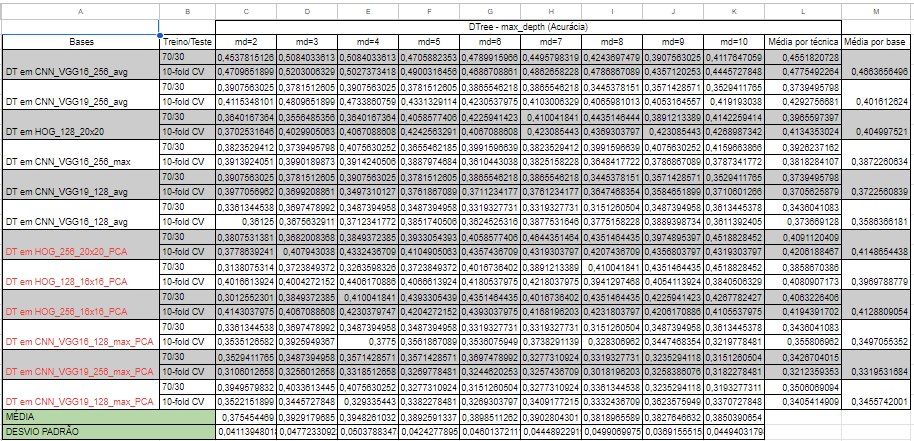